In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")


## Choosing variables and training the model.

In [27]:
df.drop(columns=['Timestamp', 'DAILY_STRESS', 'AGE', 'GENDER'], inplace=True)
df.head()


,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
0,3,2,5,0,5,2,0,1,6,4,5,0,7,5,5,1,4,0,5,609.5
1,2,4,3,8,10,5,2,2,5,2,5,5,8,2,2,2,3,2,6,655.6
2,2,3,4,4,10,3,2,2,2,2,4,5,8,10,2,2,4,8,3,631.6
3,3,10,3,10,7,2,5,2,3,5,5,0,5,7,5,1,5,2,0,622.7
4,5,3,3,10,4,2,4,2,5,0,5,0,7,0,0,2,8,1,5,663.9


In [29]:
print(df.dtypes)


FRUITS_VEGGIES               int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


In [41]:
correlation_matrix = df.corr()
round(correlation_matrix ,2)


,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.00,0.25,0.16,0.20,0.11,0.16,0.20,-0.09,0.23,0.13,0.25,0.11,0.10,-0.07,-0.07,0.15,0.17,0.16,0.20,0.45
PLACES_VISITED,0.25,1.00,0.26,0.24,0.15,0.26,0.20,-0.11,0.23,0.14,0.20,0.14,0.13,-0.13,-0.09,0.18,0.27,0.18,0.21,0.53
CORE_CIRCLE,0.16,0.26,1.00,0.34,0.31,0.29,0.22,-0.03,0.22,0.24,0.15,0.22,0.07,-0.08,-0.07,0.12,0.25,0.23,0.11,0.51
SUPPORTING_OTHERS,0.20,0.24,0.34,1.00,0.32,0.36,0.39,0.04,0.26,0.28,0.15,0.24,0.01,-0.02,-0.05,0.11,0.33,0.33,0.14,0.55
SOCIAL_NETWORK,0.11,0.15,0.31,0.32,1.00,0.25,0.16,0.02,0.20,0.24,0.22,0.18,-0.03,0.02,-0.00,0.12,0.21,0.20,-0.01,0.41
ACHIEVEMENT,0.16,0.26,0.29,0.36,0.25,1.00,0.23,-0.02,0.30,0.39,0.19,0.32,0.05,0.00,-0.04,0.11,0.40,0.37,0.16,0.56
DONATION,0.20,0.20,0.22,0.39,0.16,0.23,1.00,0.06,0.19,0.17,0.11,0.16,-0.00,-0.02,-0.05,0.12,0.28,0.19,0.14,0.46
BMI_RANGE,-0.09,-0.11,-0.03,0.04,0.02,-0.02,0.06,1.00,-0.06,0.03,-0.13,0.00,-0.10,0.04,0.06,-0.01,0.02,-0.01,-0.08,-0.25
TODO_COMPLETED,0.23,0.23,0.22,0.26,0.20,0.30,0.19,-0.06,1.00,0.30,0.20,0.27,0.11,-0.08,-0.14,0.20,0.25,0.27,0.18,0.55
FLOW,0.13,0.14,0.24,0.28,0.24,0.39,0.17,0.03,0.30,1.00,0.14,0.31,0.03,0.01,-0.06,0.08,0.22,0.48,0.14,0.48


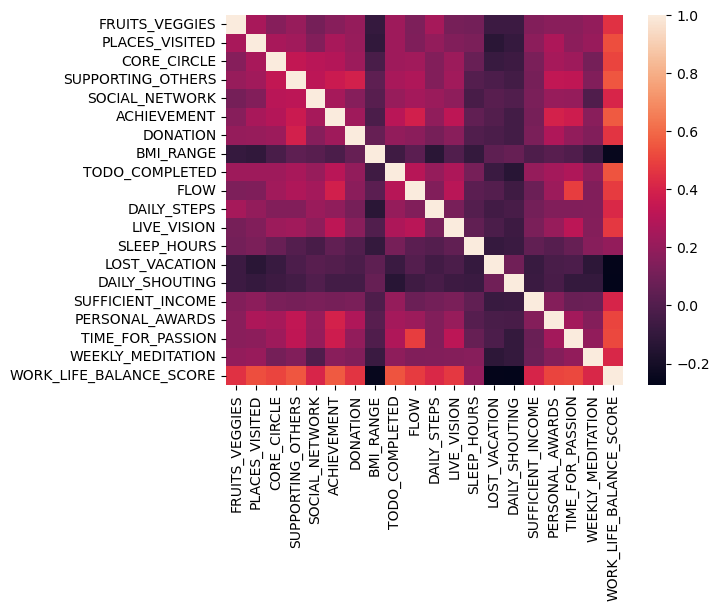

In [43]:
sns.heatmap(correlation_matrix);


## Looking for independent variables

In [47]:
independent_pairs = correlation_matrix[correlation_matrix.abs() < 0.3]
round(independent_pairs ,2)

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,NaN,0.25,0.16,0.20,0.11,0.16,0.20,-0.09,0.23,0.13,0.25,0.11,0.10,-0.07,-0.07,0.15,0.17,0.16,0.20,NaN
PLACES_VISITED,0.25,NaN,0.26,0.24,0.15,0.26,0.20,-0.11,0.23,0.14,0.20,0.14,0.13,-0.13,-0.09,0.18,0.27,0.18,0.21,NaN
CORE_CIRCLE,0.16,0.26,NaN,NaN,NaN,0.29,0.22,-0.03,0.22,0.24,0.15,0.22,0.07,-0.08,-0.07,0.12,0.25,0.23,0.11,NaN
SUPPORTING_OTHERS,0.20,0.24,NaN,NaN,NaN,NaN,NaN,0.04,0.26,0.28,0.15,0.24,0.01,-0.02,-0.05,0.11,NaN,NaN,0.14,NaN
SOCIAL_NETWORK,0.11,0.15,NaN,NaN,NaN,0.25,0.16,0.02,0.20,0.24,0.22,0.18,-0.03,0.02,-0.00,0.12,0.21,0.20,-0.01,NaN
ACHIEVEMENT,0.16,0.26,0.29,NaN,0.25,NaN,0.23,-0.02,NaN,NaN,0.19,NaN,0.05,0.00,-0.04,0.11,NaN,NaN,0.16,NaN
DONATION,0.20,0.20,0.22,NaN,0.16,0.23,NaN,0.06,0.19,0.17,0.11,0.16,-0.00,-0.02,-0.05,0.12,0.28,0.19,0.14,NaN
BMI_RANGE,-0.09,-0.11,-0.03,0.04,0.02,-0.02,0.06,NaN,-0.06,0.03,-0.13,0.00,-0.10,0.04,0.06,-0.01,0.02,-0.01,-0.08,-0.25
TODO_COMPLETED,0.23,0.23,0.22,0.26,0.20,NaN,0.19,-0.06,NaN,NaN,0.20,0.27,0.11,-0.08,-0.14,0.20,0.25,0.27,0.18,NaN
FLOW,0.13,0.14,0.24,0.28,0.24,NaN,0.17,0.03,NaN,NaN,0.14,NaN,0.03,0.01,-0.06,0.08,0.22,NaN,0.14,NaN


Independent X variables: core_circle, achievement, daily_shouting

In [49]:
#Setting the value for X and Y
X = df[['CORE_CIRCLE', 'ACHIEVEMENT', 'DAILY_SHOUTING']]
y = df['WORK_LIFE_BALANCE_SCORE']

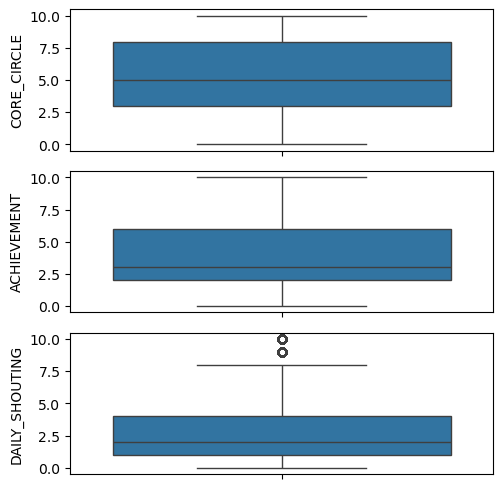

In [57]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['CORE_CIRCLE'], ax = axs[0])
plt2 = sns.boxplot(df['ACHIEVEMENT'], ax = axs[1])
plt3 = sns.boxplot(df['DAILY_SHOUTING'], ax = axs[2])

plt.tight_layout()


### Distributions of a values CORE_CIRCLE, ACHIEVEMENT, DAILY_SHOUTING

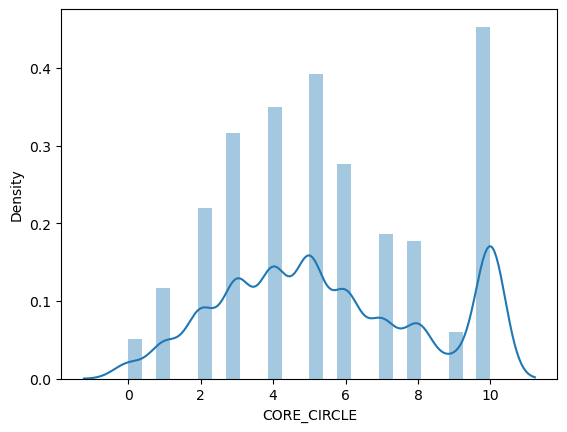

In [63]:
sns.distplot(df['CORE_CIRCLE']);


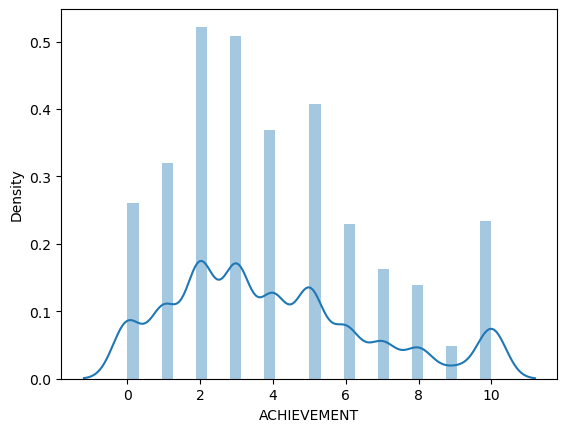

In [65]:
sns.distplot(df['ACHIEVEMENT']);

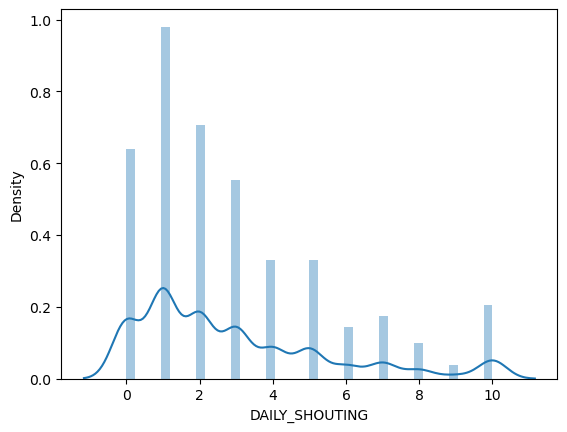

In [67]:
sns.distplot(df['DAILY_SHOUTING']);

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [71]:
y_train.shape


(11180,)

In [73]:
y_test.shape


(4792,)

In [79]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(X_train, y_train)

#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)

# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  617.0044378663056


[('CORE_CIRCLE', 5.740776597986888),
 ('ACHIEVEMENT', 7.352638605366936),
 ('DAILY_SHOUTING', -3.898423667696926)]

In [81]:
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

In [83]:
print("Prediction for test set: {}".format(y_pred))


Prediction for test set: [650.54390688 676.97800132 646.66225633 ... 633.55206801 732.34489523
 662.255951  ]


In [85]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
4283,653.7,650.543907
1606,708.1,676.978001
1673,634.2,646.662256
10980,664.9,612.464861
10331,577.0,619.817499
...,...,...
6617,621.8,642.747060
6724,640.7,699.742589
12002,681.3,633.552068
3900,749.7,732.344895


In [87]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 25.749012801346336
Mean Square Error: 1030.8906314562328
Root Mean Square Error: 32.10748559847427


The errors (MAE and RMSE) indicate a moderate level of accuracy. 